# Assignment 1, Gradient Descent

Sarah Houlton

In this notebook, we'll be applying python code to perform gradient descent to fit different models to air quality data from the machine learning repository at University of California, Irvine. This data is available at https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas

## Preparing the Data

Here we're reading in the Air Quality data, extracting just the first 46 samples and dropping rows with missing data. We are also extracting just the Carbon Monoxide readings and Hour and saving those as T and X so we can work with them as targets and inputs.

Text(0,0.5,'CO')

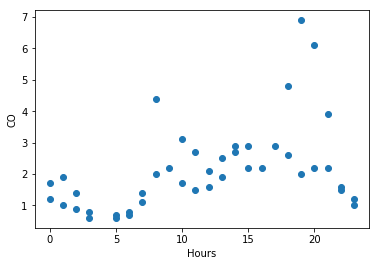

In [2]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',',
                        usecols=range(15), na_values=-200)
data = data[['Time', 'CO(GT)']]
data = data[:46]  # only use the first 46 samples
data = data.dropna(axis=0)
    
hour = np.array([int(t[:2]) for t in data['Time']])
CO = np.array(data['CO(GT)'])

T = CO.reshape(-1, 1)
Tnames = ['CO']
X = hour.reshape(-1, 1)
Xnames = ['Hour']

plt.plot(X, T, 'o')
plt.xlabel('Hours')
plt.ylabel('CO')

## Models

Here we're just laying out the different models we'll be using (linear, quadratic, cubic, and quartic). For each model, we also define the gradient of the error function in respect to the model.

### Linear

In [3]:
def linear_model(X, W):
    return X@W[1:, :] + W[0, :]

In [4]:
def linear_model_gradient(X, T, W):
    dEdY = -2 * (T - linear_model(X, W))
    dYdW = np.insert(X, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

### Quadratic

In [5]:
def quadratic_model(X, W):
    return np.hstack((X, X**2))@W[1:, :] + W[0, :]

In [6]:
def quadratic_model_gradient(X, T, W):
    dEdY = -2 * (T - quadratic_model(X, W))
    all_but_bias = np.hstack((X, X**2))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

### Cubic

In [7]:
def cubic_model(X, W):
    return np.hstack((X, X**2, X**3)) @ W[1:, :] + W[0, :]

In [8]:
def cubic_model_gradient(X, T, W):
    dEdY = -2 * (T - cubic_model(X, W))
    all_but_bias = np.hstack((X, X**2, X**3))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

### Quartic

In [9]:
def quartic_model(X, W):
    return np.hstack((X, X**2, X**3, X**4))@W[1:, :] + W[0, :]

In [10]:
def quartic_model_gradient(X, T, W):
    dEdY = -2 * (T - quartic_model(X, W))
    all_but_bias = np.hstack((X, X**2, X**3, X**4))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

## Finding the best weights

In this section we're using the models we defined above to fit the air quality data and find the appropriate weights for each model. To do this, we are testing mutiple learning rates for each model in an attempt to get the best fit.

In [11]:
def gradient_descent_adam(model_f, gradient_f, rmse_f, X, T, W, rho, n_steps):
    # Commonly used parameter values
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    m = 0
    v = 0
    
    error_sequence = []
    W_sequence = []
    
    for step in range(n_steps):
        error_sequence.append(rmse_f(model_f, X, T, W))
        W_sequence.append(W.flatten())
        
        g = gradient_f(X, T, W)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g * g
        mhat = m / (1 - beta1 ** (step+1))
        vhat = v / (1 - beta2 ** (step+1))
        W -= rho * mhat / (np.sqrt(vhat) + epsilon)
        
    return W, error_sequence, W_sequence

def rmse(model, X, T, W):
    Y = model(X, W)
    return np.sqrt(np.mean((T - Y)**2))

### Linear

In [12]:
def linear_plot(error_sequence, W_sequence, X, T, W):
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.xlabel('Iterations')
    plt.ylabel('RMSE')
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.xlabel('N_Steps')
    plt.ylabel('Weights')
    plt.legend(('W0', 'W1'))
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 23, 100).reshape(-1, 1)
    plt.plot(xs, linear_model(xs, W));
    plt.xlabel('Hour')
    plt.ylabel('CO')

#### 1.

Final RMSE for rho 0.01 at step 3000 is 1.211109


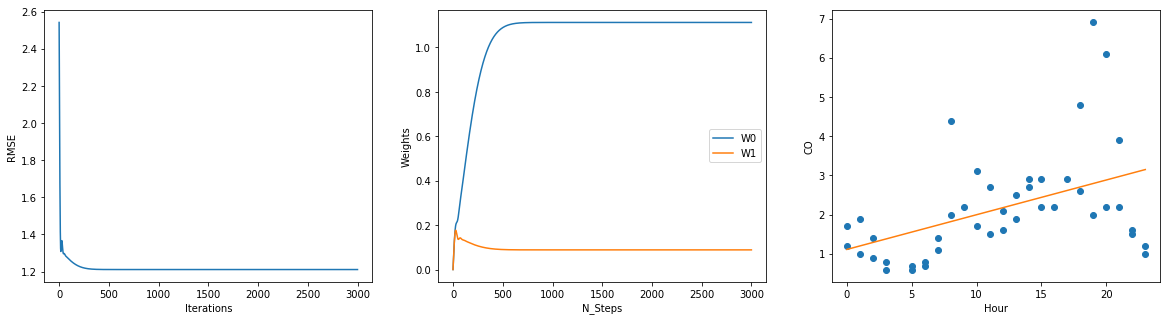

In [13]:
W1 = np.zeros((2, 1))
rho = 1.e-2
n_steps = 3000
W1, error_sequence, W_sequence = gradient_descent_adam(linear_model, linear_model_gradient, rmse, X, T, W1, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')
linear_plot(error_sequence, W_sequence, X, T, W1)

#### 2.

Final RMSE for rho 0.001 at step 3000 is 1.212212


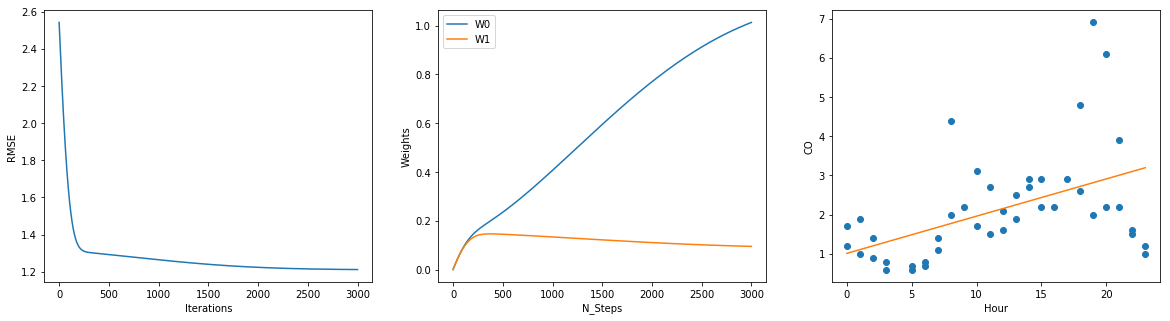

In [14]:
W2 = np.zeros((2, 1))
rho = 1.e-3
n_steps = 3000
W2, error_sequence, W_sequence = gradient_descent_adam(linear_model, linear_model_gradient, rmse, X, T, W2, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')
linear_plot(error_sequence, W_sequence, X, T, W2)

#### 3.

Final RMSE for rho 0.0001 at step 3000 is 1.301998


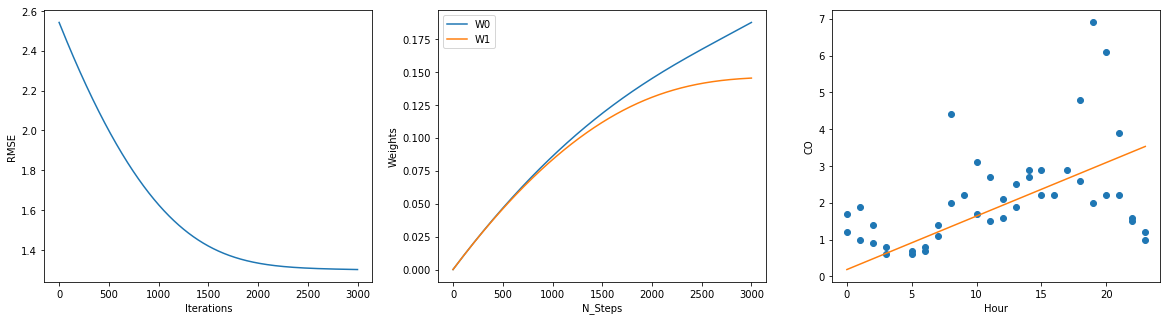

In [15]:
W3 = np.zeros((2, 1))
rho = 1.e-4
n_steps = 3000
W3, error_sequence, W_sequence = gradient_descent_adam(linear_model, linear_model_gradient, rmse, X, T, W3, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')
linear_plot(error_sequence, W_sequence, X, T, W3)

#### 4.

Final RMSE for rho 0.005 at step 3000 is 1.211109


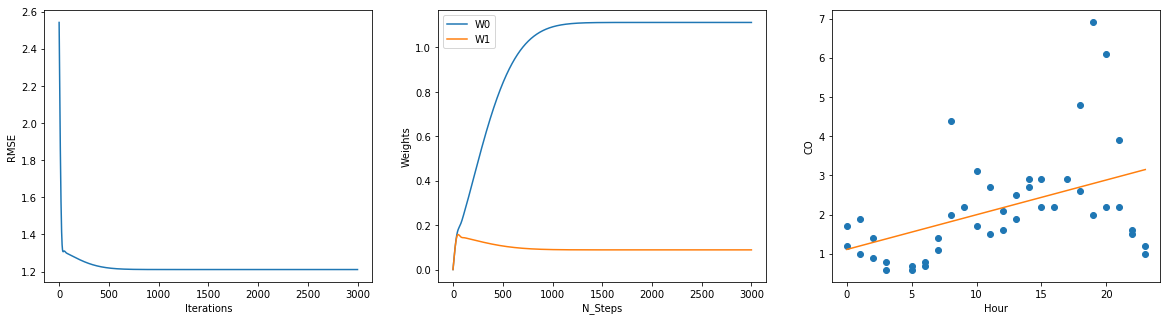

In [16]:
W4 = np.zeros((2, 1))
rho = 5.e-3
n_steps = 3000
W4, error_sequence, W_sequence = gradient_descent_adam(linear_model, linear_model_gradient, rmse, X, T, W4, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')
linear_plot(error_sequence, W_sequence, X, T, W4)

#### 5.

Final RMSE for rho 0.007 at step 3000 is 1.211109


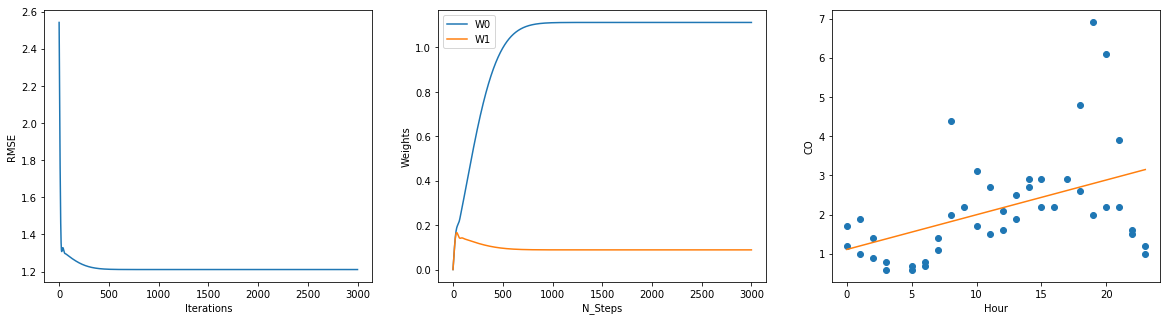

In [17]:
W5 = np.zeros((2, 1))
rho = 7.e-3
n_steps = 3000
W5, error_sequence, W_sequence = gradient_descent_adam(linear_model, linear_model_gradient, rmse, X, T, W5, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')
linear_plot(error_sequence, W_sequence, X, T, W5)

#### Conclusions

For the linear model, the lowest error hovered between .01 and .001. There aren't very many spikes, which seems to imply that this model wasn't overshooting the minimum as much as other models might. As the learning rate decreased, the error generally increased, which is probably as a result of the static number of steps. With more steps, I would expect that the error would decrease with those smaller learning rates.

### Quadratic

In [18]:
def quadratic_plot(error_sequence, W_sequence, X, T, W):
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.xlabel('Iterations')
    plt.ylabel('RMSE')
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.xlabel('N_Steps')
    plt.ylabel('Weights')
    plt.legend(('W0', 'W1', 'W2'))
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 23, 100).reshape(-1, 1)
    plt.plot(xs, quadratic_model(xs, W));
    plt.xlabel('Hour')
    plt.ylabel('CO')

#### 1.

Final RMSE for rho 0.01 at step 3000 is 1.183508


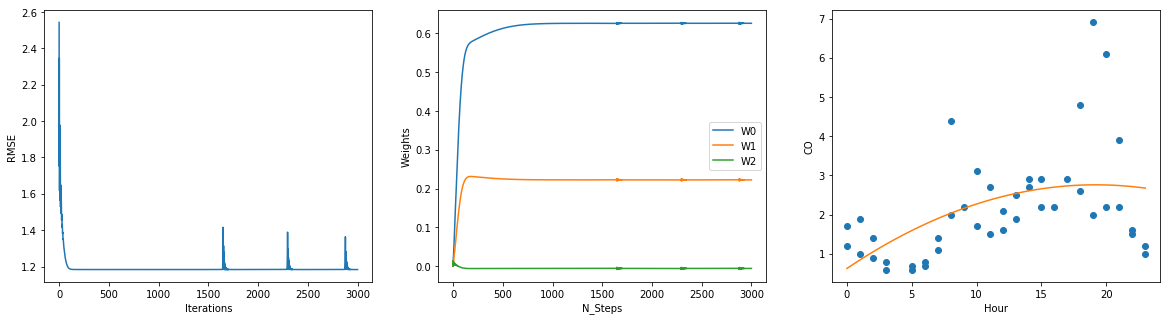

In [19]:
W1 = np.zeros((3, 1))
rho = 1.e-2
n_steps = 3000
W1, error_sequence, W_sequence = gradient_descent_adam(quadratic_model, quadratic_model_gradient, rmse, X, T, W1, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')
quadratic_plot(error_sequence, W_sequence, X, T, W1)

#### 2.

Final RMSE for rho 0.001 at step 3000 is 1.183587


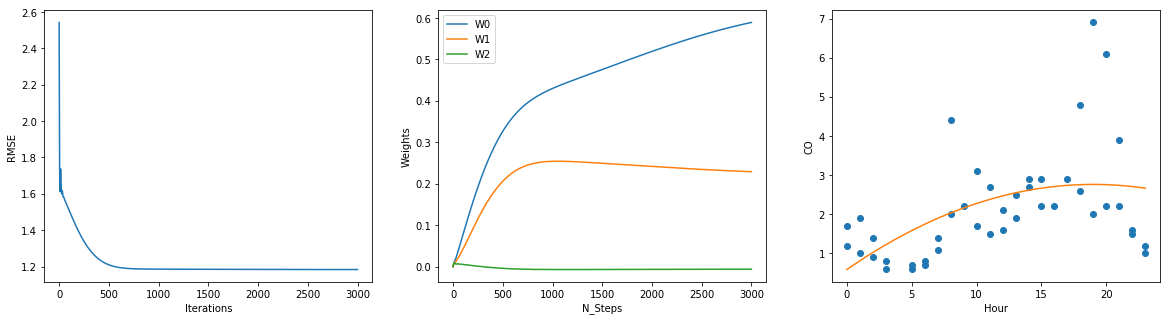

In [20]:
W2 = np.zeros((3, 1))
rho = 1.e-3
n_steps = 3000
W2, error_sequence, W_sequence = gradient_descent_adam(quadratic_model, quadratic_model_gradient, rmse, X, T, W2, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')
quadratic_plot(error_sequence, W_sequence, X, T, W2)

#### 3.

Final RMSE for rho 0.0001 at step 3000 is 1.259704


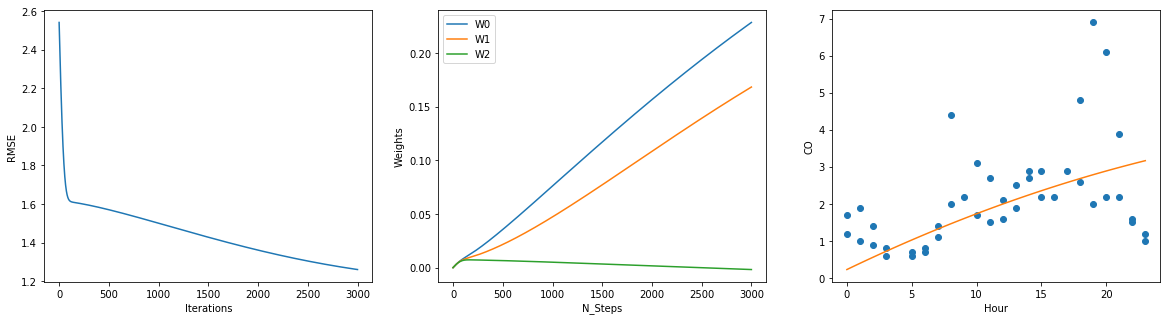

In [21]:
W3 = np.zeros((3, 1))
rho = 1.e-4
n_steps = 3000
W3, error_sequence, W_sequence = gradient_descent_adam(quadratic_model, quadratic_model_gradient, rmse, X, T, W3, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')
quadratic_plot(error_sequence, W_sequence, X, T, W3)

#### 4.

Final RMSE for rho 0.005 at step 3000 is 1.183507


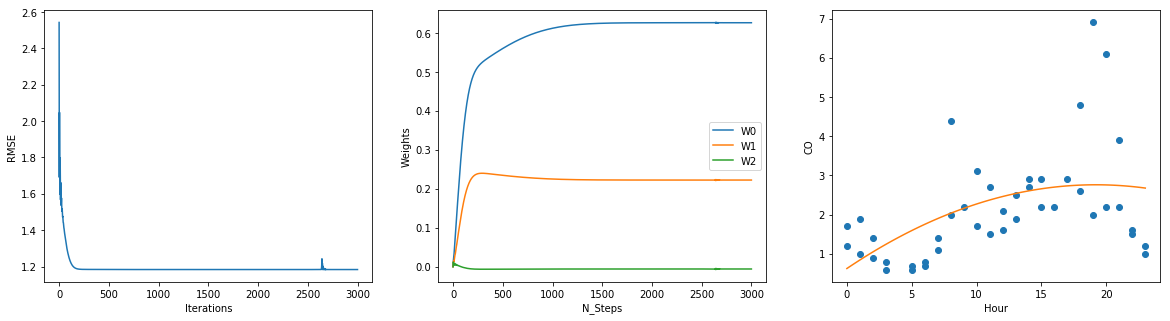

In [22]:
W4 = np.zeros((3, 1))
rho = 5.e-3
n_steps = 3000
W4, error_sequence, W_sequence = gradient_descent_adam(quadratic_model, quadratic_model_gradient, rmse, X, T, W4, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')
quadratic_plot(error_sequence, W_sequence, X, T, W4)

#### 5.

Final RMSE for rho 1e-10 at step 3000 is 2.542095


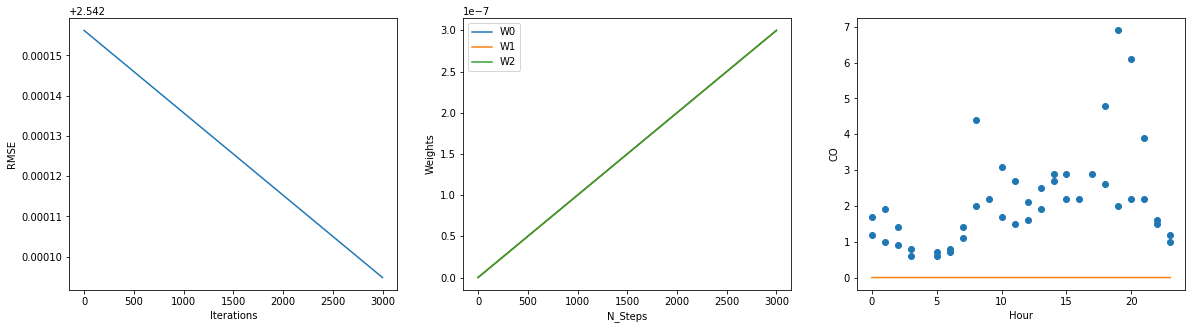

In [23]:
W5 = np.zeros((3, 1))
rho = 1.e-10
n_steps = 3000
W5, error_sequence, W_sequence = gradient_descent_adam(quadratic_model, quadratic_model_gradient, rmse, X, T, W5, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')
quadratic_plot(error_sequence, W_sequence, X, T, W5)

#### Conclusion

This model performs somewhat better than the linear model, with a lowest error of 1.18 versus 1.2. The difference is slight, but it seems to imply that a quadratic model is a better fit for this data than a linear model. As the last test, I also decided to see if the pattern of smaller learning rates leading to higher errors would continue as it had in .01 to .0001 range by testing 1.e-10. This led to the highest error of all, which seems to imply that this pattern continues. 

### Cubic

In [24]:
def cubic_plot(error_sequence, W_sequence, X, T, W):
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.xlabel('Iterations')
    plt.ylabel('RMSE')
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.xlabel('N_Steps')
    plt.ylabel('Weights')
    plt.legend(('W0', 'W1', 'W2', 'W3'))
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 23, 100).reshape(-1, 1)
    plt.plot(xs, cubic_model(xs, W));
    plt.xlabel('Hour')
    plt.ylabel('CO')

#### 1.

Final RMSE for rho 0.01 at step 3000 is 1.084574


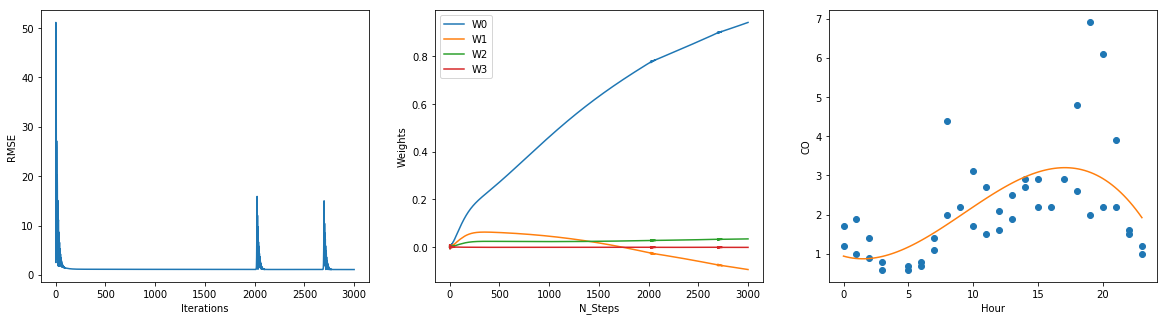

In [25]:
W1 = np.zeros((4, 1))
rho = 1.e-2
n_steps = 3000
W1, error_sequence, W_sequence = gradient_descent_adam(cubic_model, cubic_model_gradient, rmse, X, T, W1, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')
cubic_plot(error_sequence, W_sequence, X, T, W1)

#### 2. 

Final RMSE for rho 0.001 at step 3000 is 1.088751


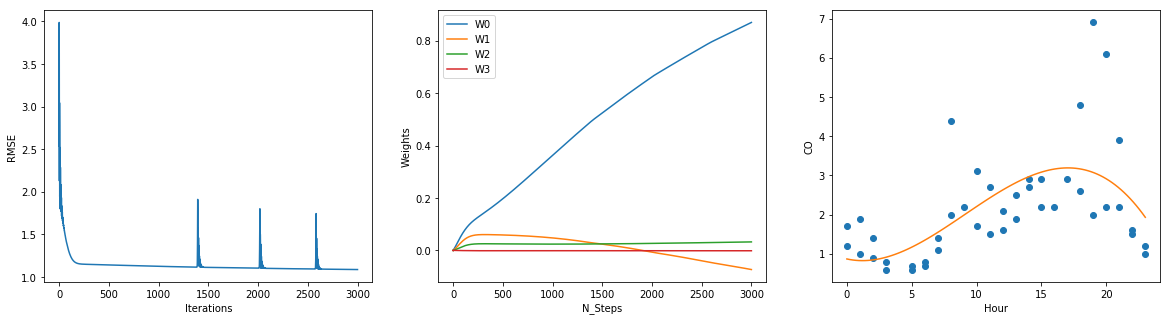

In [26]:
W2 = np.zeros((4, 1))
rho = 1.e-3
n_steps = 3000
W2, error_sequence, W_sequence = gradient_descent_adam(cubic_model, cubic_model_gradient, rmse, X, T, W2, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')
cubic_plot(error_sequence, W_sequence, X, T, W2)

#### 3. 

Final RMSE for rho 1e-06 at step 3000 is 1.794754


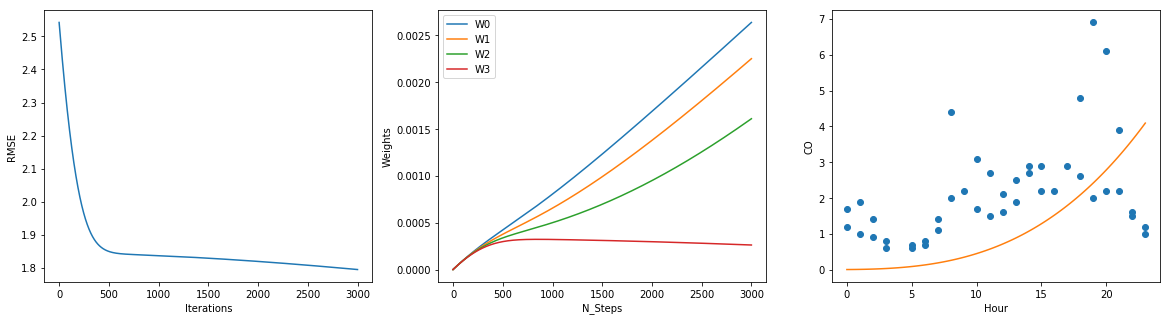

In [27]:
W3 = np.zeros((4, 1))
rho = 1.e-6
n_steps = 3000
W3, error_sequence, W_sequence = gradient_descent_adam(cubic_model, cubic_model_gradient, rmse, X, T, W3, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')
cubic_plot(error_sequence, W_sequence, X, T, W3)

#### 4.

Final RMSE for rho 0.005 at step 3000 is 1.084405


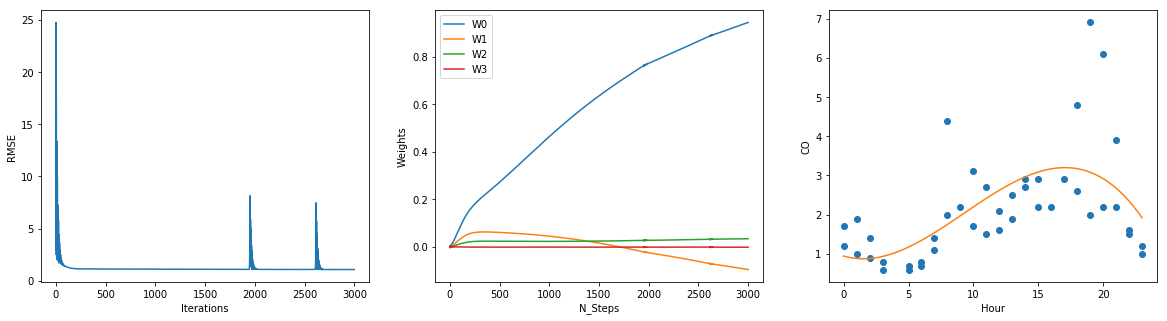

In [28]:
W4 = np.zeros((4, 1))
rho = 5.e-3
n_steps = 3000
W4, error_sequence, W_sequence = gradient_descent_adam(cubic_model, cubic_model_gradient, rmse, X, T, W4, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')
cubic_plot(error_sequence, W_sequence, X, T, W4)

#### 5. 

Final RMSE for rho 0.006 at step 3000 is 1.084437


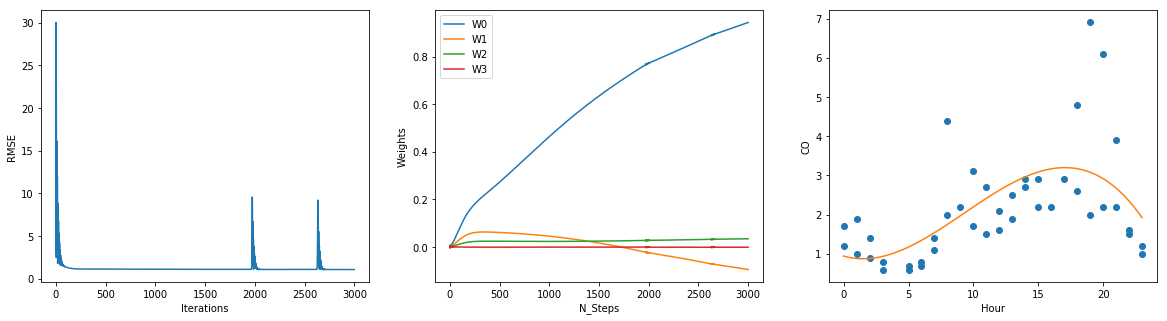

In [29]:
W5 = np.zeros((4, 1))
rho = 6.e-3
n_steps = 3000
W5, error_sequence, W_sequence = gradient_descent_adam(cubic_model, cubic_model_gradient, rmse, X, T, W5, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')
cubic_plot(error_sequence, W_sequence, X, T, W5)

#### 6.

Final RMSE for rho 0.005 at step 6000 is 1.064701


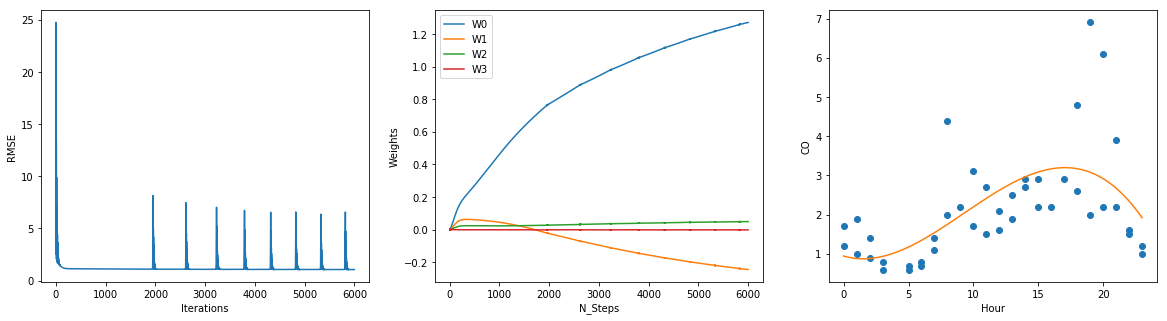

In [30]:
W6 = np.zeros((4, 1))
rho = 5.e-3
n_steps = 6000
W6, error_sequence, W_sequence = gradient_descent_adam(cubic_model, cubic_model_gradient, rmse, X, T, W6, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')
cubic_plot(error_sequence, W_sequence, X, T, W5)

#### Conclusions

From these tests it seems that the optimal learning rate for 3000 iterations hovers around 0.005 - 0.006. As the rate gets smaller, the final RMSE gets higher, probably due to the stable number of iterations. In the final experiment I upped the number of iterations, and was able to get an even better final RMSE. It was also interesting to note that the larger the final RMSE was, the more spikes were visible. It's possible that this is due to overshooting the minimum as we approach the true minimum, and so if we don't get close to the minimum we're less likely to overshoot, but it would probably take more tests to know for sure.  

### Quartic

In [31]:
def quartic_plot(error_sequence, W_sequence, X, T, W):
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.xlabel('Iterations')
    plt.ylabel('RMSE')
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.xlabel('N_Steps')
    plt.ylabel('Weights')
    plt.legend(('W0', 'W1', 'W2', 'W3', 'W4'))
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 23, 100).reshape(-1, 1)
    plt.plot(xs, quartic_model(xs, W));
    plt.xlabel('Hour')
    plt.ylabel('CO')

#### 1.

Final RMSE for rho 0.01 at step 3000 is 1.111958


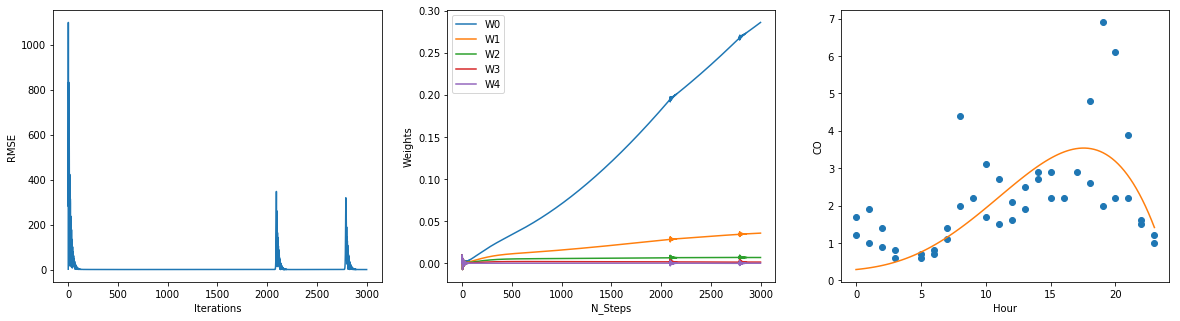

In [32]:
W1 = np.zeros((5, 1))
rho = 1.e-2
n_steps = 3000
W1, error_sequence, W_sequence = gradient_descent_adam(quartic_model, quartic_model_gradient, rmse, X, T, W1, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')
quartic_plot(error_sequence, W_sequence, X, T, W1)

#### 2.

Final RMSE for rho 0.0001 at step 3000 is 1.147893


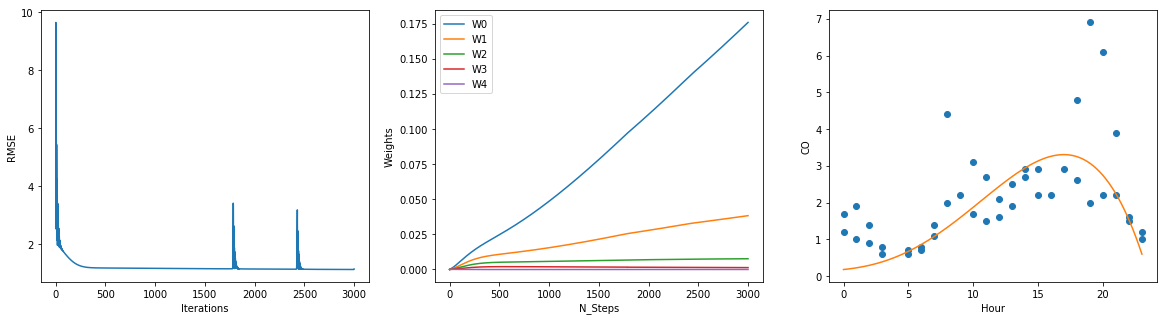

In [33]:
W2 = np.zeros((5, 1))
rho = 1.e-4
n_steps = 3000
W2, error_sequence, W_sequence = gradient_descent_adam(quartic_model, quartic_model_gradient, rmse, X, T, W2, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')
quartic_plot(error_sequence, W_sequence, X, T, W2)

#### 3.

Final RMSE for rho 0.001 at step 3000 is 1.112129


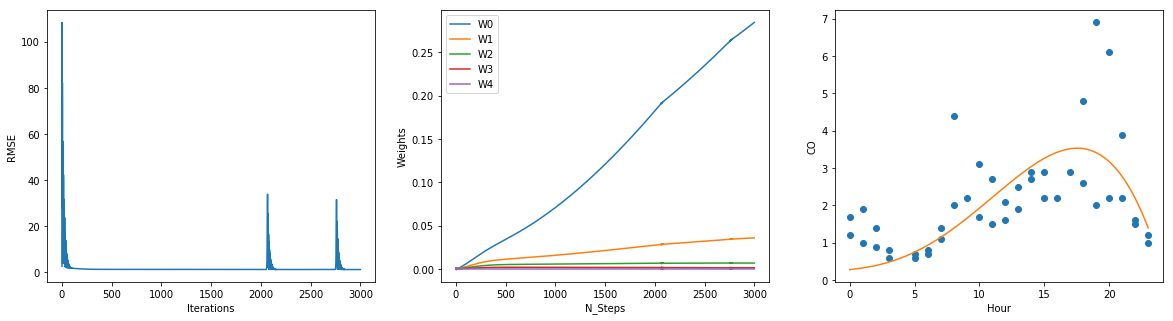

In [34]:
W3 = np.zeros((5, 1))
rho = 1.e-3
n_steps = 3000
W3, error_sequence, W_sequence = gradient_descent_adam(quartic_model, quartic_model_gradient, rmse, X, T, W3, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')
quartic_plot(error_sequence, W_sequence, X, T, W3)

#### 4.

Final RMSE for rho 1e-05 at step 3000 is 1.181940


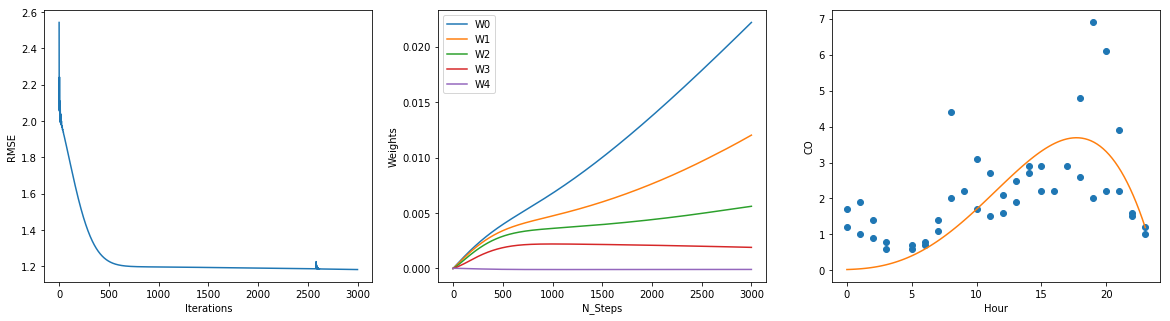

In [35]:
W4 = np.zeros((5, 1))
rho = 1.e-5
n_steps = 3000
W4, error_sequence, W_sequence = gradient_descent_adam(quartic_model, quartic_model_gradient, rmse, X, T, W4, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')
quartic_plot(error_sequence, W_sequence, X, T, W4)

#### 5.

Final RMSE for rho 0.005 at step 3000 is 1.111921


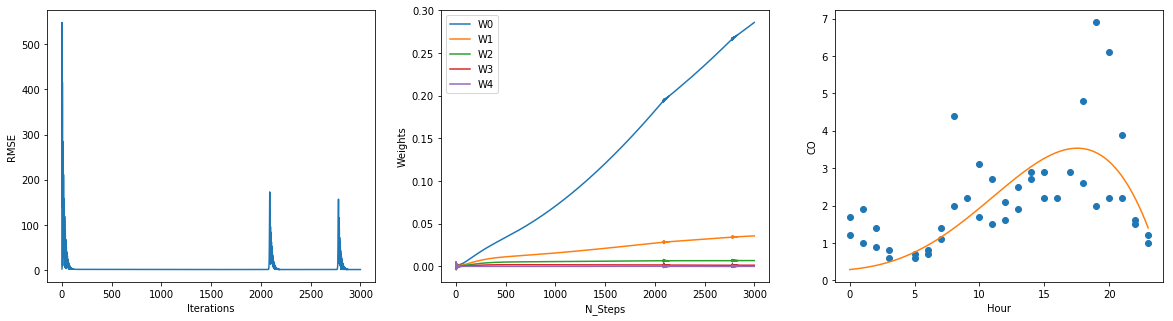

In [36]:
W5 = np.zeros((5, 1))
rho = 5.e-3
n_steps = 3000
W5, error_sequence, W_sequence = gradient_descent_adam(quartic_model, quartic_model_gradient, rmse, X, T, W5, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {error_sequence[-1]:4f}')
quartic_plot(error_sequence, W_sequence, X, T, W5)

#### Conclusions

This model follows the pattern of the above models, where the best learning rate looks to fall between .01 and .001. Interestingly, though, this model doesn't seem to settle on a W0 value in the same way the other models do. Looking at the weights versus steps graph, the W0 line doesn't flatten out in the same way it does in the other models. It just seems to keep increasing regardless of learnng rate, which might mean that the optimal learning rate with a stable W0 lies outside of the constraints laid out for learning rate. 

### Final Conclusions

For this data, the cubic model gives the lowest error rate of 1.06. This makes sense, because in looking at the raw data, it does look most like a cubic out of the available options. As this is just a subset of the data, however, it's hard to draw conclusions on what would fit the data as a whole best.

## Grading

In [37]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Houlton-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2]).reshape(-1, 1)
  Y = linear_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2, -3]).reshape(-1, 1)
  Y = quadratic_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2, -3, 1.5).reshape(-1, 1)
  Y = cubic_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2, -3, 1.5, 0.3]).reshape(-1, 1)
  Y = quartic_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 

<Figure size 432x288 with 0 Axes>